In [226]:
import pandas as pd
import numpy as np

testDict = {}

def createDict():
    testDict["Atlanta Hawks"] = "ATL"
    testDict["Brooklyn Nets"] = "BRK"
    testDict["Boston Celtics"] = "BOS"
    testDict["Charlotte Hornets"] = "CHO"
    testDict["Chicago Bulls"] = "CHI"
    testDict["Cleveland Cavaliers"] = "CLE"
    testDict["Dallas Mavericks"] = "DAL"
    testDict["Denver Nuggets"] = "DEN"
    testDict["Detroit Pistons"] = "DET"
    testDict["Golden State Warriors"] = "GSW"
    testDict["Houston Rockets"] = "HOU"
    testDict["Indiana Pacers"] = "IND"
    testDict["Los Angeles Clippers"] = "LAC"
    testDict["Los Angeles Lakers"] = "LAL"
    testDict["Memphis Grizzlies"] = "MEM"
    testDict["Miami Heat"] = "MIA"
    testDict["Milwaukee Bucks"] = "MIL"
    testDict["Minnesota Timberwolves"] = "MIN"
    testDict["New Orleans Pelicans"] = "NOP"
    testDict["New York Knicks"] = "NYK"
    testDict["Oklahoma City Thunder"] = "OKC"
    testDict["Orlando Magic"] = "ORL"
    testDict["Philadelphia 76ers"] = "PHI"
    testDict["Phoenix Suns"] = "PHO"
    testDict["Portland Trail Blazers"] = "POR"
    testDict["Sacramento Kings"] = "SAC"
    testDict["San Antonio Spurs"] = "SAS"
    testDict["Toronto Raptors"] = "TOR"
    testDict["Utah Jazz"] = "UTA"
    testDict["Washington Wizards"] = "WAS"
    testDict["Charlotte Bobcats"] = "CHA"
    testDict["New Orleans Hornets"] = "NOH"
    testDict["New Jersey Nets"] = "NJN"

In [237]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats, 2 - opposing team per game stats
                          # 3 - misc stats
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 3:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W'] #relabel columns
            elif n >= 1 and n <= 3:
                if n == 3:
                    a = a.iloc[1:31, 0:24] #delete first row of misc stats dataframe
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    a = a[:30] #using rows 0-29
                    if 'PTS\\' in a: #cleaning columns that have '\' in them
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                        a['PTS'] = a['PTS'].astype(str)
                        a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                        a['PTS'] = a['PTS'].astype(float)
                    if n == 2:
                        a = a.iloc[:, 0:25]
                        a.columns = ['oRk', 'Team', 'G', 'MP', 'oFG', 'oFGA', 'oFG%', 'o3P', 'o3PA', 'o3P%', 'o2P', 'o2PA', 'o2P%', 'oFT', 'oFTA', 'oFT%', 'oORB', 'oDRB', 'oTRB', 'oAST', 'oSTL', 'oBLK', 'oTOV', 'oPF', 'oPTS']
                        #labels for opponent stats
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            #print(a)    
            a["Tm"] = a.apply(lambda x: testDict[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n > 3:
            a['PYT'] = a.apply(lambda x: str(x.Player) + str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        #print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

In [236]:
teamPGVars = ['teamPG09.csv', 'teamPG10.csv', 'teamPG11.csv' , 'teamPG12.csv', 'teamPG13.csv', 'teamPG14.csv', 'teamPG15.csv',  'teamPG16.csv', 'teamPG17.csv', 'teamPG18.csv']
teamVars = ['tstats09.csv', 'tstats10.csv', 'tstats11.csv', 'tstats12.csv', 'tstats13.csv', 'tstats14.csv', 'tstats15.csv', 'tstats16.csv', 'tstats17.csv', 'tstats18.csv']   
oTeamPG = ['oTeamPG09.csv', 'oTeamPG10.csv', 'oTeamPG11.csv', 'oTeamPG12.csv', 'oTeamPG13.csv' , 'oTeamPG14.csv' , 'oTeamPG15.csv' , 'oTeamPG16.csv', 'oTeamPG17.csv', 'oTeamPG18.csv']
miscData = ['miscStats09.csv', 'miscStats10.csv', 'miscStats11.csv', 'miscStats12.csv', 'miscStats13.csv', 'miscStats14.csv', 'miscStats15.csv', 'miscStats16.csv', 'miscStats17.csv', 'miscStats18.csv']




In [234]:
tPG = inputData(teamPGVars, 1)

In [235]:
createDict()

In [230]:
oTPG = inputData(oTeamPG, 2)

In [231]:
tms = inputData(teamVars, 0)

In [232]:
aData = inputData(miscData, 3)

In [233]:
tPG.to_csv('tPG1.csv')
oTPG.to_csv('oTPG1.csv')
tms.to_csv('tms1.csv')
aData.to_csv('aData1.csv')

In [34]:
for col in aData.columns:
    if col != 'Rk' and col != 'Tm' and col != 'Team' and col != 'TMYR':
        aData[col] = aData[col].astype(float)

In [35]:
result1 = pd.merge(tPG, oTPG, on = 'TMYR')

In [36]:
result1

,Rk,Team_x,G_x,MP_x,FG,FGA,FG%,3P,3PA,3P%,...,oORB,oDRB,oTRB,oAST,oSTL,oBLK,oTOV,oPF,oPTS,Tm_y
0,1.0,Phoenix Suns,82.0,240.9,41.1,81.6,0.504,6.7,17.6,0.383,...,12.1,28.7,40.8,21.2,8.6,4.5,14.2,22.9,107.5,PHO
1,2.0,Golden State Warriors,82.0,242.4,39.4,86.0,0.458,6.7,18.0,0.373,...,14.2,32.9,47.1,24.1,7.9,5.0,15.0,23.5,112.3,GSW
2,3.0,Los Angeles Lakers,82.0,241.2,40.3,85.1,0.474,6.7,18.5,0.361,...,11.7,29.8,41.5,22.6,7.7,4.8,15.5,22.1,99.3,LAL
3,4.0,New York Knicks,82.0,241.5,38.5,86.5,0.445,10.0,27.9,0.360,...,11.6,34.5,46.1,21.6,8.0,5.3,14.5,19.4,107.8,NYK
4,5.0,Indiana Pacers,82.0,241.8,39.3,86.3,0.455,8.0,21.0,0.378,...,11.1,33.0,44.1,21.1,7.7,5.4,14.0,20.6,106.2,IND
5,6.0,Denver Nuggets,82.0,240.6,37.3,79.4,0.470,6.7,18.0,0.371,...,12.1,29.2,41.2,21.4,7.9,5.5,15.4,23.7,100.9,DEN
6,7.0,Utah Jazz,82.0,242.4,38.3,80.8,0.475,4.8,13.7,0.349,...,11.1,29.2,40.3,20.0,8.0,5.2,16.1,24.0,100.9,UTA
7,8.0,Chicago Bulls,82.0,243.0,38.1,83.5,0.457,6.0,15.8,0.381,...,12.4,30.4,42.8,21.0,7.6,5.5,14.4,20.8,102.5,CHI
8,9.0,Dallas Mavericks,82.0,241.5,38.1,82.6,0.462,7.0,19.9,0.350,...,10.8,30.6,41.4,19.6,7.2,4.1,13.0,20.1,99.8,DAL
9,10.0,Orlando Magic,82.0,240.6,35.7,78.2,0.457,10.0,26.2,0.381,...,10.5,31.6,42.1,18.1,6.9,3.8,13.1,22.4,94.4,ORL


In [37]:
result1.to_csv('result1.csv')

In [38]:
result2 = pd.merge(result1, aData)

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [39]:
result2 = pd.merge(result1, aData, on = 'TMYR')

In [40]:
result2.to_csv('result2.csv')

In [41]:
result2.corr()['W']

Rk_x      -0.507502
G_x        0.187037
MP_x       0.023232
FG         0.403815
FGA       -0.129518
FG%        0.663718
3P         0.321713
3PA        0.225039
3P%        0.542373
2P         0.018201
2PA       -0.344242
2P%        0.629014
FT         0.218579
FTA        0.171919
FT%        0.151959
ORB       -0.191337
DRB        0.382514
TRB        0.251481
AST        0.373599
STL        0.190597
BLK        0.251614
TOV       -0.283452
PF        -0.202399
PTS        0.485912
oRk       -0.565577
G_y        0.187037
MP_y       0.023232
oFG       -0.367493
oFGA       0.024917
oFG%      -0.626600
             ...   
oDRB      -0.337346
oTRB      -0.382374
oAST      -0.461742
oSTL      -0.247872
oBLK      -0.446813
oTOV       0.052236
oPF        0.206735
oPTS      -0.400904
Age        0.516189
W          1.000000
L         -0.929681
PW         0.973977
PL        -0.899174
MOV        0.952489
SOS       -0.346935
SRS        0.948818
ORtg       0.763187
DRtg      -0.618764
Pace      -0.039514


In [42]:
(result2.corr()['W']).to_csv('corrs.csv')

In [53]:
def combineAndFilter(var, percent):
    df1 = inputData(var, 10)
    
    df2 = inputData(playerStats, 10)
    
    df = pd.merge(df1, df2, how = 'inner', on = 'PYT')
    
    
    df = df[df['Tm_x'] != 'TOT']
    df = df[df['VORP\\'] == df['VORP\\']] #takes out np.nan
    
    df['VORP\\'] = df['VORP\\'].astype(str)
    df['VORP\\'] = [s.replace('\\', '') for s in df['VORP\\']]
    df['VORP'] = df['VORP\\'].astype(float)
    df['PS/G\\'] = df['PS/G\\'].astype(str)
    df['PS/G\\'] = [s.replace('\\', '') for s in df['PS/G\\']]
    df['PS/G'] = df['PS/G\\'].astype(float)
    df = df.drop(['VORP\\'], axis = 1)
    df = df.drop(['PS/G\\'], axis = 1)
    #reset index for dropping a row
    #g = df.shape[0]
    #for i in range(0, g):
        #if i < g-1 and (df.iloc[i,1] == df.iloc[i + 1, 1]):
            #if(df.iloc[i, 1] > df.iloc[i+1, 1]):
                #df.iat[i, 28] = df.iat[i+1, 28] + df.iat[i, 28]
                #df.iat[i + 1, 28] = -10
                #temp = df[i + 1, :]
                #df.iloc[i + 1,:] = df.iloc[i, :].values
                #df.iloc[i,:] = temp.values
            #else:
                #df.iat[i + 1, 28] = df.iat[i+1, 28] + df.iat[i, 28]
                #df.iat[i, 28] = -10
    
    p = np.percentile(df['VORP'], percent)
    print(p)
    
    df = df[df['VORP'] >= p]
    
    #df = df[['TMYR', 'VORP']]
    s = df.groupby(['TMYR_x']).sum().reset_index()
    #s.to_csv('merged.csv')
    return s

In [44]:
advancedStats = ['apstats09.csv', 'apstats10.csv', 'apstats11.csv', 'apstats12.csv', 'apstats13.csv', 'apstats14.csv', 'apstats15.csv', 'apstats16.csv', 'apstats17.csv', 'apstats18.csv']




In [54]:
df1 = combineAndFilter(advancedStats, 95)

3.0


In [245]:

df1['TMYR'] = df1['TMYR_x']
full1 = pd.merge(df1, tms, on = 'TMYR')
tms


,TMYR,W
1,CLE0,66
2,BOS0,62
3,LAL0,65
4,ORL0,59
5,POR0,54
6,HOU0,53
7,SAS0,54
8,DEN0,54
9,UTA0,48
10,ATL0,47


In [56]:
full1['W'] = full1['W'].astype(int)

In [57]:
full1['W'].corr()

TypeError: corr() missing 1 required positional argument: 'other'

In [58]:
full1.corr()['W']

Age_x          0.472326
G_x            0.454329
MP_x           0.444638
PER            0.469092
TS%            0.449245
3PAr           0.430571
FTr            0.341262
ORB%           0.044468
DRB%           0.265809
TRB%           0.225626
AST%           0.504493
STL%           0.460963
BLK%           0.188042
TOV%           0.440721
USG%           0.439911
Unnamed: 19         NaN
OWS            0.539855
DWS            0.545372
WS             0.586655
WS/48          0.557905
Unnamed: 24         NaN
OBPM           0.498592
DBPM           0.300453
BPM            0.584177
Age_y          0.472326
G_y            0.454329
GS             0.464131
MP_y           0.418480
FG             0.425487
FGA            0.413936
FG%            0.425827
3P             0.432741
3PA            0.429649
3P%            0.449955
2P             0.338382
2PA            0.311883
2P%            0.442675
eFG%           0.450717
FT             0.365878
FTA            0.353318
FT%            0.438466
ORB            0

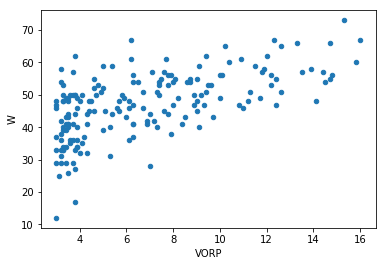

In [60]:
full1.plot.scatter(x = 'VORP', y = 'W')

In [51]:
%matplotlib inline

In [52]:
playerStats = ["pstats09.csv", "pstats10.csv", "pstats11.csv", "pstats12.csv", "pstats13.csv", "pstats14.csv", "pstats15.csv", "pstats16.csv", "pstats17.csv", "pstats18.csv" ]



In [61]:
import seaborn as sns 

In [62]:
from urllib.request import urlopen

In [63]:
from bs4 import BeautifulSoup


In [219]:
def modified_input_data(urls):
    
    
    header = []
    frames = []
    final = []
    html = urlopen(urls[0])
    soup = BeautifulSoup(html, 'lxml')
    col_labels = soup.find_all('th')
    col_str = str(col_labels)
    cleanheader = BeautifulSoup(col_str, 'lxml').get_text()
    header.append(cleanheader)
    headerFrame = pd.DataFrame(header)
    hF = headerFrame[0].str.split(',', expand = True) 
    hF = hF.iloc[:,1:29]
    hF.columns = range(0, 28)
    
    
    counter = 0
    for url in urls:
        frames = [hF]
        html = urlopen(url)
        soup = BeautifulSoup(html, 'lxml')
        rows = soup.find_all('tr')
        
        list_all = []
        for row in rows:
            row_td = row.find_all('td')
            str_cells = str(row_td)
            cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
            list_all.append(cleantext)
        df = pd.DataFrame(list_all)
        df = df[0].str.split(',', expand = True)
        df = df.iloc[:, 0:28]
        frames.append(df)
        df2 = pd.concat(frames)
        df2 = df2.rename(columns = df2.iloc[0])
        df2 = df2.drop(df2.index[0])
        df2 = df2.dropna(axis = 0, how = 'any')
        
        df2['YR'] = df2.apply(lambda x: str(counter), axis = 1)
        print(df2.columns)
        #df["TMYR"] = df.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        #df['PYT'] = df.apply(lambda x: str(x.Player) + str(x.Tm) + str(counter), axis = 1)
        
        
        
        counter = counter + 1
        final.append(df2)
    
    df3 = pd.concat(final)
    df3['TMYR'] = df3.apply(lambda x: x[' Tm'] + x.YR, axis = 1)
    df3.to_csv('fra.csv')
    print(df3)
    
    
    
    return df3

In [220]:
urls = ["https://www.basketball-reference.com/leagues/NBA_1989_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1990_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1991_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1992_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1993_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1994_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1995_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1996_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1997_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1998_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1999_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2000_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2001_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2002_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2003_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2004_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2005_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2006_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2007_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2008_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2009_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2010_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2011_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2012_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2013_advanced.html","https://www.basketball-reference.com/leagues/NBA_2014_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2015_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2016_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2017_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2018_advanced.html" ]
urls2 = ["https://www.basketball-reference.com/leagues/NBA_2017_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2018_advanced.html"]


In [221]:
s = modified_input_data(urls)

Index([' Player', ' Pos', ' Age', ' Tm', ' G', ' MP', ' PER', ' TS%', ' 3PAr',
       ' FTr', ' ORB%', ' DRB%', ' TRB%', ' AST%', ' STL%', ' BLK%', ' TOV%',
       ' USG%', '  ', ' OWS', ' DWS', ' WS', ' WS/48', '  ', ' OBPM', ' DBPM',
       ' BPM', ' VORP', 'YR'],
      dtype='object')
Index([' Player', ' Pos', ' Age', ' Tm', ' G', ' MP', ' PER', ' TS%', ' 3PAr',
       ' FTr', ' ORB%', ' DRB%', ' TRB%', ' AST%', ' STL%', ' BLK%', ' TOV%',
       ' USG%', '  ', ' OWS', ' DWS', ' WS', ' WS/48', '  ', ' OBPM', ' DBPM',
       ' BPM', ' VORP', 'YR'],
      dtype='object')
Index([' Player', ' Pos', ' Age', ' Tm', ' G', ' MP', ' PER', ' TS%', ' 3PAr',
       ' FTr', ' ORB%', ' DRB%', ' TRB%', ' AST%', ' STL%', ' BLK%', ' TOV%',
       ' USG%', '  ', ' OWS', ' DWS', ' WS', ' WS/48', '  ', ' OBPM', ' DBPM',
       ' BPM', ' VORP', 'YR'],
      dtype='object')
Index([' Player', ' Pos', ' Age', ' Tm', ' G', ' MP', ' PER', ' TS%', ' 3PAr',
       ' FTr', ' ORB%', ' DRB%', ' TRB%', ' AST%', ' S

Index([' Player', ' Pos', ' Age', ' Tm', ' G', ' MP', ' PER', ' TS%', ' 3PAr',
       ' FTr', ' ORB%', ' DRB%', ' TRB%', ' AST%', ' STL%', ' BLK%', ' TOV%',
       ' USG%', '  ', ' OWS', ' DWS', ' WS', ' WS/48', '  ', ' OBPM', ' DBPM',
       ' BPM', ' VORP', 'YR'],
      dtype='object')
                    Player  Pos  Age    Tm    G     MP    PER    TS%   3PAr  \
1    [Kareem Abdul-Jabbar*    C   41   LAL   74   1695   12.9   .511   .005   
2              [Mark Acres    C   26   BOS   62    632    8.2   .507   .009   
3           [Michael Adams   PG   26   DEN   77   2787   17.5   .567   .431   
4            [Mark Aguirre   SF   29   TOT   80   2597   16.4   .524   .137   
5            [Mark Aguirre   SF   29   DAL   44   1529   17.3   .509   .119   
6            [Mark Aguirre   SF   29   DET   36   1068   15.1   .551   .170   
7             [Danny Ainge   PG   29   TOT   73   2377   18.0   .554   .290   
8             [Danny Ainge   PG   29   BOS   45   1349   17.5   .553   .263   


In [238]:
df1

,TMYR_x,Age_x,G_x,MP_x,PER,TS%,3PAr,FTr,ORB%,DRB%,...,DRB,TRB,AST,STL,BLK,TOV,PF,VORP,PS/G,TMYR
0,ATL0,27.0,79.0,3124.0,18.2,0.534,0.292,0.255,2.4,10.5,...,3.6,4.4,5.8,1.1,0.2,2.5,2.2,3.0,21.4,ATL0
1,ATL1,75.0,238.0,8602.0,59.7,1.668,0.261,0.935,21.6,54.5,...,16.7,23.2,11.4,3.4,3.3,5.8,7.7,12.2,51.2,ATL1
2,ATL2,49.0,154.0,5349.0,39.9,1.127,0.152,0.508,14.4,47.4,...,13.8,17.8,6.8,2.1,2.6,4.1,5.3,7.8,31.8,ATL2
3,ATL3,26.0,66.0,2329.0,21.1,0.499,0.099,0.292,6.9,24.8,...,7.5,9.6,3.9,1.4,1.7,2.5,2.6,3.5,18.8,ATL3
4,ATL4,26.0,74.0,2756.0,19.8,0.560,0.006,0.196,8.2,23.0,...,7.6,10.2,3.2,1.1,1.1,2.0,2.2,3.5,17.4,ATL4
5,ATL5,28.0,74.0,2482.0,19.8,0.545,0.202,0.373,7.2,21.9,...,6.4,8.5,3.1,1.7,1.1,2.5,2.8,3.2,17.9,ATL5
6,ATL6,90.0,224.0,7126.0,56.2,1.827,1.017,0.705,14.3,53.1,...,15.2,19.1,8.9,3.4,2.8,5.0,6.3,10.4,44.0,ATL6
7,ATL7,59.0,163.0,5278.0,40.7,1.121,0.462,0.506,14.7,39.7,...,12.1,16.3,6.5,2.6,3.2,3.7,4.9,9.0,32.3,ATL7
8,BOS0,86.0,240.0,8553.0,53.8,1.749,0.787,1.060,10.1,37.9,...,11.7,14.3,14.6,3.8,0.6,7.1,7.1,12.0,50.6,BOS0
9,BOS1,23.0,81.0,2963.0,19.1,0.540,0.088,0.312,4.3,10.5,...,3.2,4.4,9.8,2.3,0.1,3.0,2.4,4.1,13.7,BOS1
